<a href="https://colab.research.google.com/github/ucsd-cse-spis-2023/shoesherlock-Tri-Kevin/blob/main/Spis_2023_shoesherlock_project_Kevin_Tri_v2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ShoeSherlock**: Shoes Brands Recognition Project
##By: Manh Tri Nguyen & Yuan-Kai (Kevin) Yang
###Supported by: SPIS Mentors - Emmett, Samvrit, Sonia, Audria, Ryan L, and Ryan D

##Importing Neccessary Libraries

In [1]:
!pip install split-folders matplotlib opencv-python spicy tensorflow==2.13.*

In [2]:
!python -c "import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
!python -c "import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))"

tf.Tensor(-1249.9948, shape=(), dtype=float32)


2023-09-06 09:36:40.203086: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[]


In [3]:
import tensorflow as tf
tf.AggregationMethod

tensorflow.python.ops.gradients_util.AggregationMethod

In [4]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

!pip install google-colab
# Only use if you are not running locally
#from google.colab import drive
#drive.mount('/content/drive')

  Using cached google-colab-1.0.0.tar.gz (72 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  C:\Users\keviny168\AppData\Local\Temp\pip-install-3xrf_s_c\pandas_442a2b5235f34fbf8eb44857606c4829\setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    import pkg_resources
  C:\Users\keviny168\anaconda3\envs\colab\lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist.fetch_build_eggs(dist.setup_requires)
  error in pandas setup command: 'install_requires' must

##Processing Images

In [5]:
!pip install split-folders

In [ ]:
#splitting folders into test, val and train data if you have your own datasets.
#Only use this for large amount of data sets to make sure you don't lose out on the specific
#If you already split your folders, DON'T run again.
import splitfolders
splitfolders.ratio("C:\\Users\\keviny168\\Downloads\\archive\\train_data", # The location of dataset
                   output="C:\\Users\\keviny168\\Downloads\\archive\\new_train", # The output location
                   seed=42, # The number of seed
                   ratio=(.7, .2, .1), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )

##Data generators

In [8]:
datagen = ImageDataGenerator()
#define class name
class_names = ['Nike', 'Adidas']

In [9]:
# training data
train_generator = datagen.flow_from_directory(
    directory="C:\\Users\\keviny168\\Downloads\\archive\\new_train\\train",
    classes = class_names,
    target_size=(224, 224),
    batch_size=256,
    class_mode="binary",
)

Found 12344 images belonging to 2 classes.


In [ ]:
# validation data
valid_generator = datagen.flow_from_directory(
    directory="C:\\Users\\keviny168\\Downloads\\archive\\new_train\\val",
    classes = class_names,
    target_size=(224, 224),
    batch_size=64,
    class_mode="binary",
)

In [11]:
# test data
test_generator = datagen.flow_from_directory(
    directory="C:\\Users\\keviny168\\Downloads\\archive\\new_train\\test",
    classes = class_names,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
)

Found 1765 images belonging to 2 classes.


##Training ML Model

In [12]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [13]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(2, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [14]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [15]:
# launch the training
model_history = trainModel(model = model, epochs = 15, optimizer = "Adam")

Epoch 1/15


C:\Users\keviny168\anaconda3\envs\colab\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - 745s 15s/step - loss: 0.8338 - accuracy: 0.5334 - val_loss: 0.6719 - val_accuracy: 0.5753
Epoch 2/15
49/49 [==============================] - 744s 15s/step - loss: 0.6725 - accuracy: 0.5747 - val_loss: 0.6212 - val_accuracy: 0.6107
Epoch 3/15
49/49 [==============================] - 734s 15s/step - loss: 0.5959 - accuracy: 0.6676 - val_loss: 0.5118 - val_accuracy: 0.7664
Epoch 4/15
49/49 [==============================] - 734s 15s/step - loss: 0.5030 - accuracy: 0.7539 - val_loss: 0.4121 - val_accuracy: 0.8171
Epoch 5/15
49/49 [==============================] - 736s 15s/step - loss: 0.4474 - accuracy: 0.7998 - val_loss: 0.3700 - val_accuracy: 0.8463
Epoch 6/15
49/49 [==============================] - 733s 15s/step - loss: 0.4043 - accuracy: 0.8244 - val_loss: 0.3326 - val_accuracy: 0.8636
Epoch 7/15
49/49 [==============================] - 733s 15s/step - loss: 0.3891 - accuracy: 0.8278 - val_loss: 0.3101 - val_accuracy: 0.8758
Epoch 8/15
49/49 

##Graph and Evaluation

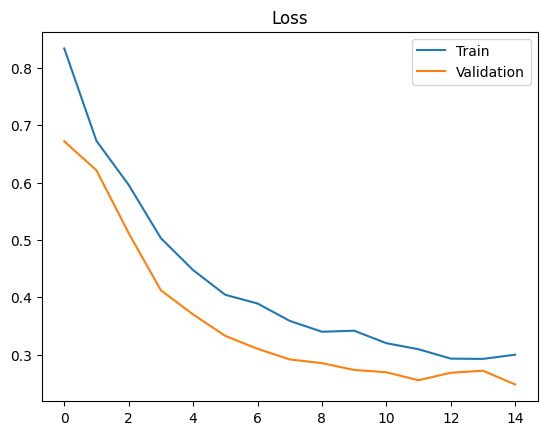

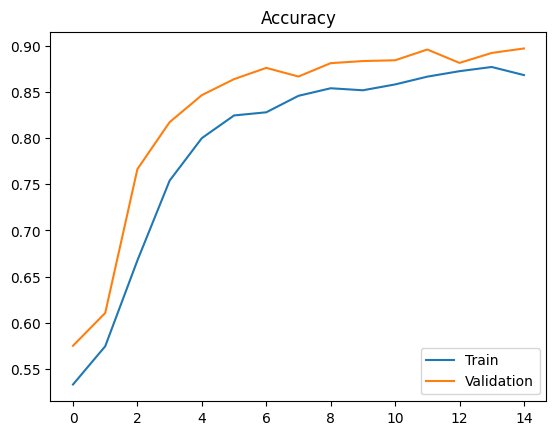

In [16]:
# graph loss and accuracy
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [17]:
#evaluation
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

56/56 [==============================] - 84s 2s/step - loss: 0.2533 - accuracy: 0.8952
The test loss is:  0.2533460855484009
The best accuracy is:  89.51841592788696


##Saving the model

In [19]:
model.save('C:\\Users\\keviny168\\Downloads\\model_save.keras')
#put directory only on local, otherwise to use the {name}.keras format

##Test

In [39]:
#Load model that you download
from keras.models import load_model
loaded_model = load_model('C:\\Users\\keviny168\\Downloads\\model_save.keras')

In [69]:
# generate predictions for samples
img = tf.keras.preprocessing.image.load_img("C:\\Users\\keviny168\\Downloads\\edshoes.jpg", target_size=(224, 224)) #change directory for sample
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array])

In [72]:
#print out prediction

prediction = loaded_model.predict(img_array)
print(prediction)
if np.argmax(prediction, axis=1)[0] == 1: #
  print("Adidas")
else:
  print("Nike")

1/1 [==============================] - 0s 112ms/step
[[0.23091967 0.7690803 ]]
Adidas
